Wybraliśmy dane związane z rakiem piersi, ponieważ uważamy, że to aktualny i bardzo ważny temat. Który powinniśmy badać, aby lepiej zrozumieć i przeciwdziałać chorobie.

In [21]:
#importujemy bibliotekę pandas oraz matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("../Data/breast-cancer-wisconsin-data.csv",header=0)

In [23]:
#wybieramy dwa pierwsze wiersze z danych
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


<b>Kolumny:
ID - identyfikator danej osoby
Diagnosis - informuje nas o tym czy rak jest złośliwy czy łagodny 
M = złośliwy, B = łagodny</b>
<p>Kolejne kolumny to wartości obliczane dla każdego jądra komórkowego:</p>
<ul>
<li>radius - promień nowotworu</li>
<li>texture - tekstura nowotworu</li>
<li>permieter - obwód</li>
<li>area - obszar</li>
<li>smothness - zmiana długości promienia nowotworu</li>
<li>compactness - obwód^2 / obczar - 1.0</li>
<li>concavity - wklęsłość (stopeń wklęsłości konturu) </li>
<li>concave points - liczba wklęskłych konturów</li>
<li>symmetry - symetria</li>
<li>fractal dimension - wymiar fraktalny (wymiar podobieństwa) </li>
</ul>

Zbiór danych jest podzielony na trzy części (od 3 kolumny), od 3 do 13 to średnia, od 13 do 23 to błąd standardowy, od 23 do 32 najgorszy lub najwięszy (średnia z trzech największych wartości) 

Rozkład klas: 357 łagodny, 212 złośliwy

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [25]:
#usuwamy kolumnę Unnamed: 32 
data.drop("Unnamed: 32",axis=1,inplace=True)

In [26]:
#sprwadzamy czy kolumna została usunięta
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
#ponieważ ID jest nam nie potrzebne, także usuwamy je
data.drop("id", axis = 1, inplace = True)

In [28]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [29]:
#wypisujemy dane ze względu na ich rodzaj, czyli mean,standard error, worst
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [30]:
#Teraz wartości M i B zamieniamy na wartości boolowskie
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [31]:
#Dzięki funkcji describe możemy wypisać podstawowe obliczenia na kolumnach
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [32]:
import seaborn as sns #wywołujemy bibliotekę seaborn do wizualizacji danych

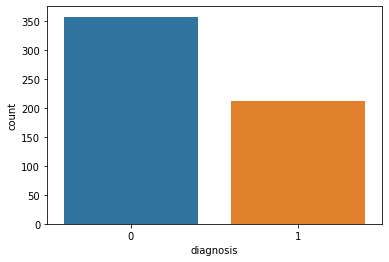

In [34]:
#wyświetlamy wykres słupkowy dwóch wartości 0 i 1,
#skaluje je ilość przypadków ze względu na klasyfikację nowotworu
sns.countplot(data['diagnosis'],label="Count")

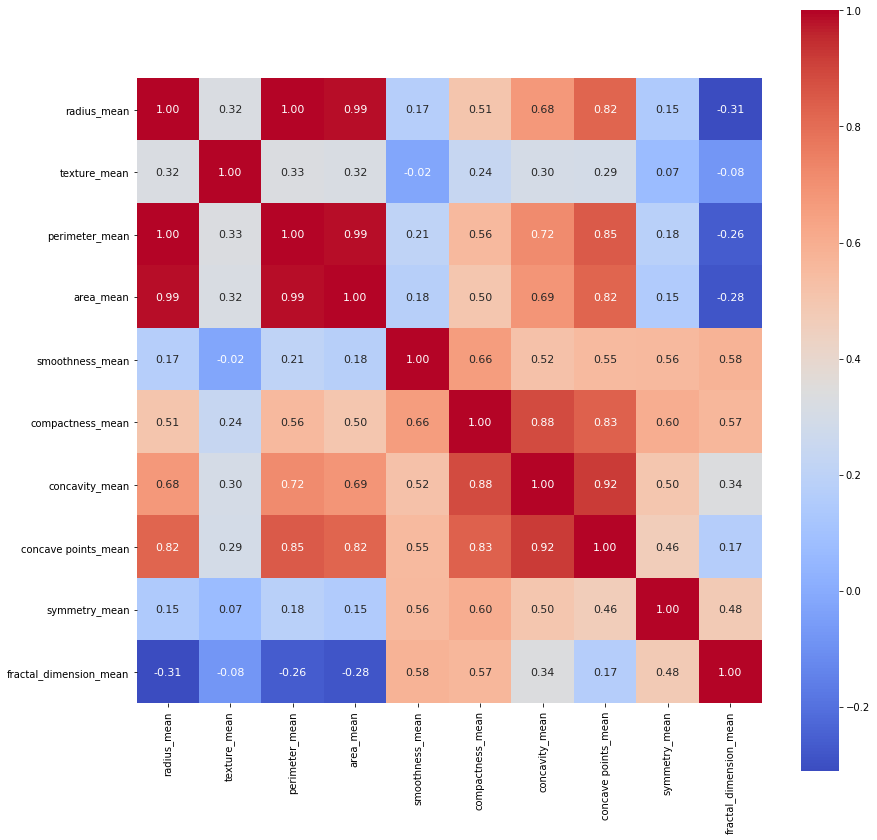

In [38]:
#teraz sprawdzimy korelację między kolumnami 
corr = data[features_mean].corr() # funkcja corr pomaga odnaleść nam koleralcję miedzy danymi
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 11},
           xticklabels= features_mean, yticklabels= features_mean,cmap= 'coolwarm')
#Tworzymy macierz

Z macierza możemy wyczytać:
<ul>
    <li>radius i area są ściśle skorelowane, zgodnie z oczekiwaniem ich relacji</li>
    <li>compactness, concavity i concavepoint są wysoko skorelowane, więc używamy tylko compactness </li>
</ul>
<b>Więc będziemy korzystać z: perimeter_mean, texture_mean, compactness_mean, symmetry_mean</b>
<p>Ponieważ są to najmniej ze sobą skorelowane dane</p>

In [39]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']